<a href="https://colab.research.google.com/github/SachinScaler/ProbAndStats_Sep24/blob/main/Bayes_Theorem_Application%7CLecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kerala Flood Dataset:
The dataset contains the monthly rainfall data from years 1901 to 2018 for the Indian state of Kerala. Kerala is one of the few states which are usually badly hit by monsoons every year

In [24]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Mp2bQl5QJ6O2tcezb0ceBQIn8vW5us0N -O kerala.csv

--2024-09-21 03:20:51--  https://drive.google.com/uc?id=1Mp2bQl5QJ6O2tcezb0ceBQIn8vW5us0N
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Mp2bQl5QJ6O2tcezb0ceBQIn8vW5us0N [following]
--2024-09-21 03:20:51--  https://drive.usercontent.google.com/download?id=1Mp2bQl5QJ6O2tcezb0ceBQIn8vW5us0N
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10300 (10K) [application/octet-stream]
Saving to: ‘kerala.csv’

kerala.csv          100%[===================>]  10.06K  --.-KB/s    in 0s      

2024-09-21 03:20:53 (84.0 MB/s) - ‘kerala.csv’ saved 

In [25]:
# Import libraries
import numpy as np
import pandas as pd

# Read the data
df = pd.read_csv("kerala.csv")
df.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
5,KERALA,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,NO
6,KERALA,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,YES
7,KERALA,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0,2648.3,NO
8,KERALA,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3,3050.2,YES
9,KERALA,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1,2848.6,NO


In [26]:
df.shape

(118, 16)

### Let's calculate average rainfall per year

In [27]:
cols =  ['JAN', 'FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

df[cols].mean()

,0
JAN,12.218644
FEB,15.633898
MAR,36.670339
APR,110.330508
MAY,228.644915
JUN,651.617797
JUL,698.220339
AUG,430.369492
SEP,246.207627
OCT,293.207627


<BarContainer object of 12 artists>

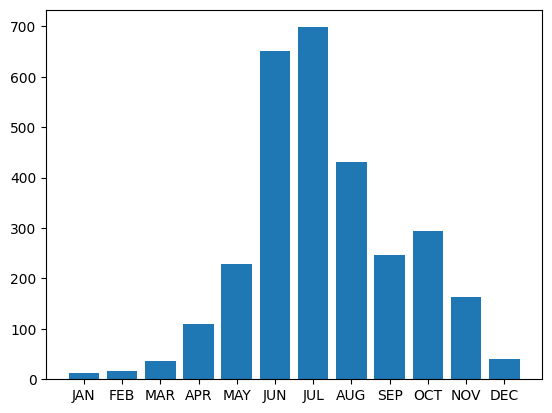

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

x = df[cols].mean().index
y =  df[cols].mean().values
plt.bar(x, y)

In [29]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [30]:
impact_cols = ['YEAR', 'JUN', 'JUL', 'OCT', ' ANNUAL RAINFALL', 'FLOODS' ]

df_impact = df[impact_cols]
df_impact.head()

,YEAR,JUN,JUL,OCT,ANNUAL RAINFALL,FLOODS
0,1901,824.6,743.0,266.9,3248.6,YES
1,1902,390.9,1205.0,358.4,3326.6,YES
2,1903,558.6,1022.5,354.1,3271.2,YES
3,1904,1098.2,725.5,328.1,3129.7,YES
4,1905,850.2,520.5,383.5,2741.6,NO


In [31]:
threshold_jun = df_impact['JUN'].median()
threshold_july = df_impact['JUL'].median()
threshold_oct = df_impact['OCT'].median()

threshold_an = df_impact[' ANNUAL RAINFALL'].median()

In [32]:
threshold_jun, threshold_july, threshold_oct, threshold_an

(625.5999999999999, 691.65, 284.3, 2934.3)

In [33]:
df_impact['JUN'] > threshold_jun

,JUN
0,True
1,False
2,False
3,True
4,True
...,...
113,False
114,False
115,False
116,False


In [34]:
(df_impact['JUN'] > threshold_jun).astype(int)

,JUN
0,1
1,0
2,0
3,1
4,1
...,...
113,0
114,0
115,0
116,0


In [35]:
for col, thresh in zip(impact_cols, [threshold_jun, threshold_july, threshold_oct, threshold_an]):
  df_impact[col] = (df_impact[col] > thresh).astype(int)

df_impact.head()

<ipython-input-35-62232619d3cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impact[col] = (df_impact[col] > thresh).astype(int)
<ipython-input-35-62232619d3cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impact[col] = (df_impact[col] > thresh).astype(int)
<ipython-input-35-62232619d3cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,YEAR,JUN,JUL,OCT,ANNUAL RAINFALL,FLOODS
0,1,1,1,0,3248.6,YES
1,1,0,1,0,3326.6,YES
2,1,0,1,0,3271.2,YES
3,1,1,1,0,3129.7,YES
4,1,1,1,0,2741.6,NO


### Q1. Calculate the Probability of flood given that rainfall in June is greater than the median june rainfall value (threshold for heavy rainfall)

P(F|Jun_H) -> p(F intersection jun_H)/ p(jun_H)

In [40]:
pd.crosstab(df_impact['JUN'], df_impact['FLOODS'],
            margins=True, margins_name="Total"
            )

FLOODS,NO,YES,Total
JUN,,,
0,48,24,72
1,10,36,46
Total,58,60,118


### HW:

In [41]:
pd.crosstab(df_impact['JUN'], df_impact['FLOODS'],
            margins=True, margins_name="Total",
            normalize = 'index'
            )

FLOODS,NO,YES
JUN,,
0,0.666667,0.333333
1,0.217391,0.782609
Total,0.491525,0.508475


### Q2. Calculate the Probability of flood given that rainfall in JULY is greater than the median JULY rainfall value (threshold for heavy rainfall)